## Step 1: Downloading the data

The url for the pima-indian-diabetes data set is found at:  https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/ and the directory contains 2 important files, 1 being the dataset itself in a .txt format, and the other is the description of the data. While there is always the option of manually downloading the data and description files into the local drive, importing them straight from website will create less clutter.

In [1]:
root = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/'
dataset = 'pima-indians-diabetes.data'
description = 'pima-indians-diabetes.names'

In [2]:
import requests
import sys
import pandas as pd
from io import StringIO
desc_res = requests.get(root+description)
data_res = requests.get(root+dataset)


def get_desc(res):
    global desc
    if res.status_code != 200:
        sys.stdout.write('File not found, try downloading straight from website')
        sys.stdout.flush()
    else:
        desc = res.text  
        
    return print(desc)
 
    
def get_data(data):
    global df
    if data.status_code != 200:
        sys.stdout.write('Data not found, try downloading straight from website')
        sys.stdout.flush()
    else:
        df = pd.read_csv(StringIO(data_res.text),header=None)
        
    return df

In [3]:
print(get_desc(desc_res))

1. Title: Pima Indians Diabetes Database

2. Sources:
   (a) Original owners: National Institute of Diabetes and Digestive and
                        Kidney Diseases
   (b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu)
                          Research Center, RMI Group Leader
                          Applied Physics Laboratory
                          The Johns Hopkins University
                          Johns Hopkins Road
                          Laurel, MD 20707
                          (301) 953-6231
   (c) Date received: 9 May 1990

3. Past Usage:
    1. Smith,~J.~W., Everhart,~J.~E., Dickson,~W.~C., Knowler,~W.~C., \&
       Johannes,~R.~S. (1988). Using the ADAP learning algorithm to forecast
       the onset of diabetes mellitus.  In {\it Proceedings of the Symposium
       on Computer Applications and Medical Care} (pp. 261--265).  IEEE
       Computer Society Press.

       The diagnostic, binary-valued variable investigated is whether the
       patien

In [4]:
print(get_data(data_res))

      0    1   2   3    4     5      6   7  8
0     6  148  72  35    0  33.6  0.627  50  1
1     1   85  66  29    0  26.6  0.351  31  0
2     8  183  64   0    0  23.3  0.672  32  1
3     1   89  66  23   94  28.1  0.167  21  0
4     0  137  40  35  168  43.1  2.288  33  1
5     5  116  74   0    0  25.6  0.201  30  0
6     3   78  50  32   88  31.0  0.248  26  1
7    10  115   0   0    0  35.3  0.134  29  0
8     2  197  70  45  543  30.5  0.158  53  1
9     8  125  96   0    0   0.0  0.232  54  1
10    4  110  92   0    0  37.6  0.191  30  0
11   10  168  74   0    0  38.0  0.537  34  1
12   10  139  80   0    0  27.1  1.441  57  0
13    1  189  60  23  846  30.1  0.398  59  1
14    5  166  72  19  175  25.8  0.587  51  1
15    7  100   0   0    0  30.0  0.484  32  1
16    0  118  84  47  230  45.8  0.551  31  1
17    7  107  74   0    0  29.6  0.254  31  1
18    1  103  30  38   83  43.3  0.183  33  0
19    1  115  70  30   96  34.6  0.529  32  1
20    3  126  88  41  235  39.3  0

Now, we have both the description of the data and the actual dataset saved as 'desc' and 'df' respectively. It is now time to use desc as a reference to clean up df for EDA and further analysis. From point #7 in desc, we can see that each columns from 0 to 7 represents a variable and the last column 8 is a binary result of 1 and 0 to signifify whether or not a person has diabetes.

## Step 2: Cleaning up the data

In [5]:
dfcol = ['preg','gluc','blood','skin','insul','bmi','dpf','age','diab']
df.columns = dfcol
print('There are null values in the dataframe: ' + str(df.isnull().values.any()))
df.describe()

There are null values in the dataframe: False


,preg,gluc,blood,skin,insul,bmi,dpf,age,diab
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From the initial descriptive statistics, we can tell that around 35% of all individuals in the study has tested positive for diabetes according to the standards. The next step is to now do some EDA to learn more about our dataset, and to split our dataset into testing and training sections to validate our model later on.

In [111]:
test_size, train_size = 0.2, 0.8
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=test_size, random_state=123, stratify=y)
print('Training sample has ' + str(len(df_train)) + ' datapoints.')
print('Testing sample has ' + str(len(df_test)) + ' datapoints.')

Training sample has 614 datapoints.
Testing sample has 154 datapoints.


## Step 3: Exploratory Data Analysis

The first step in EDA is to take each individual factor as a stand-alone risk, and to search for any apparent trends with respect to having diabetes or not.

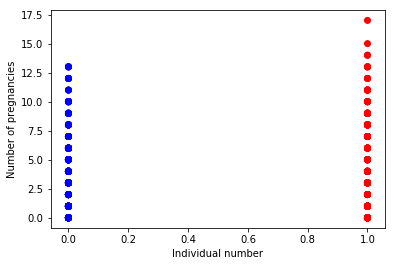

In [112]:
import matplotlib.pyplot as plt
import numpy as np
test = df_train[['preg','diab']]
col = np.where(test['diab']==1,'r','b')
plt.scatter(test['diab'],test['preg'],c=col)
plt.xlabel('Individual number')
plt.ylabel('Number of pregnancies')
plt.show()

As one can observe from the plot, gaining insights from a plot of diabetes status against risk factor proves to be quite difficult unless there is an extremely clear pattern. Another method is to then plot each individual's risk factor as a data point and vary the colour of the data point based on the diabetic status of that individual.

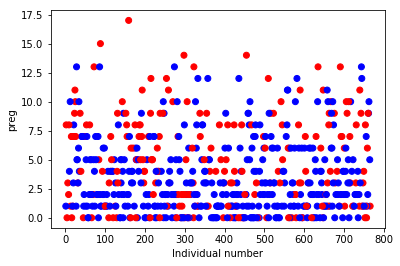

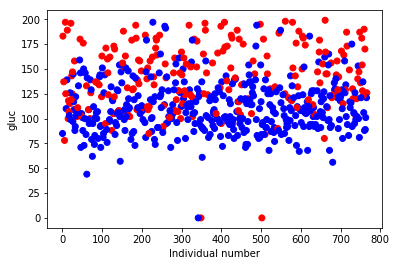

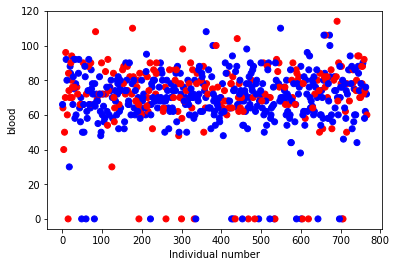

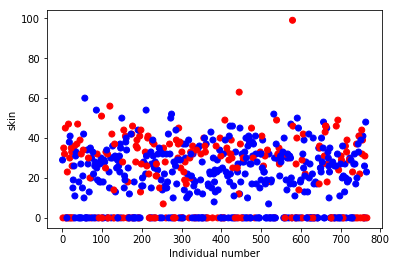

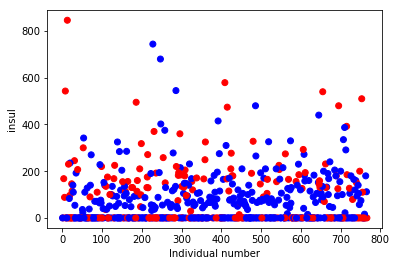

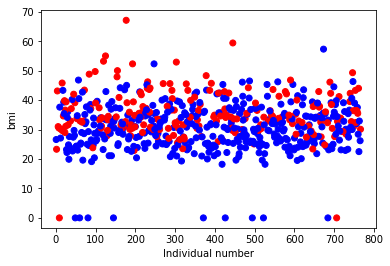

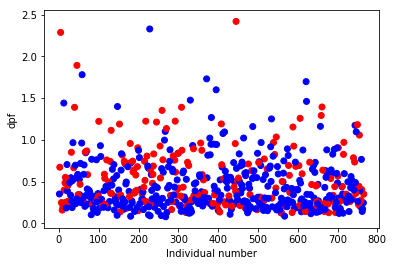

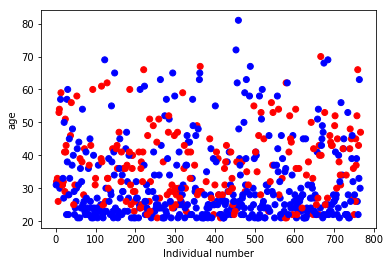

In [113]:
factors = dfcol[0:len(dfcol)-1]
risks = [df_train[[factor,'diab']] for factor in factors]
for plots in risks:
    col = np.where(plots['diab']==1,'r','b')
    plt.scatter(plots.index, plots.iloc[:,0], c=col)
    plt.xlabel('Individual number')
    plt.ylabel(str(plots.columns[0]))
    plt.show()

Unfortunately, not all of the risk factors alone show a pattern with having diabetes. However, from observing the different plots we argue that diabetes is more evident in individuals with <br>1. Higher plasma glucose conentration (gluc) <br>2. Higher body mass index (bmi) <br> 3. Older (age) <br><br>We could get more insight into the data by grouping each risk into percentiles and spotting any trend of diabetes as we move up each bin instead of just looking at the graphs. The chosen bins will be the 4 quartiles.

In [114]:
quantiles = 20
#input has to be in the form of a str, ""
def get_diabetic(fac, quantiles=quantiles):
    
    inter = risks[factors.index(fac)].reset_index()
    inter['index'] = pd.qcut(inter[fac], quantiles, labels=False, duplicates='drop')
    diabetic = inter.groupby(['index','diab']).count().reset_index()
    diabetic = diabetic[diabetic.diab == 1].drop('diab',1).reset_index().drop('level_0',1)
    
    return diabetic
    
    
def get_bin_total(fac, quantiles=quantiles):
    
    inter = risks[factors.index(fac)].reset_index()
    inter['index'] = pd.qcut(inter[fac], quantiles, labels=False, duplicates='drop')
    bin_total = inter.groupby('index').count().reset_index()
    bin_total = bin_total.drop('diab',1)
    
    return bin_total

In [115]:
get_bin_total('preg')

,index,preg
0,0,196
1,1,85
2,2,61
3,3,52
4,4,43
5,5,37
6,6,37
7,7,29
8,8,25
9,9,20


The above 2 functions extracts each risk factor individually and splits the series up into desired quantiles. The next step is then to calculate the percentages of diabetic individuals in each catergory and spot trends and patterns.

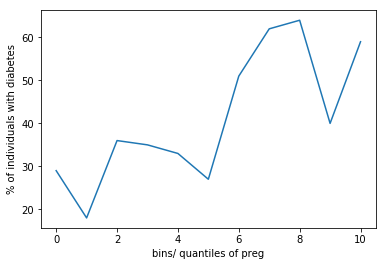

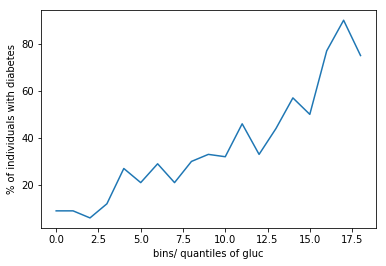

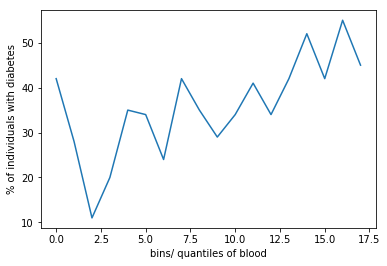

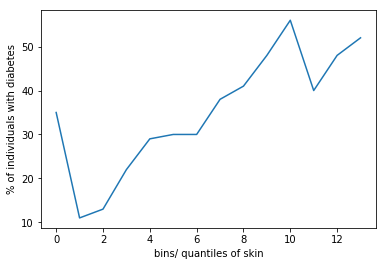

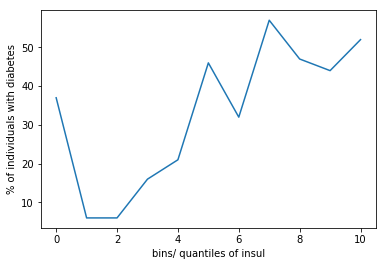

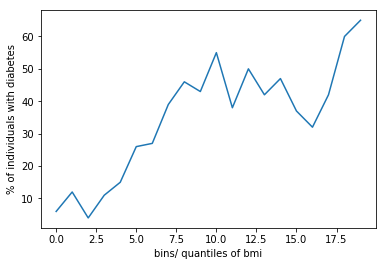

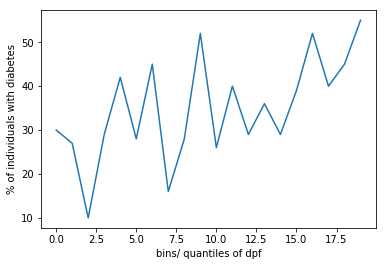

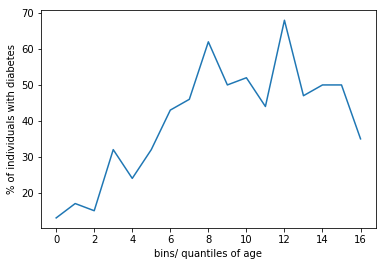

In [116]:
def get_trends(fac, quantiles=quantiles):
    return round(get_diabetic(fac)/get_bin_total(fac)*100,0).drop('index', 1)


for i in factors:
    plt.plot(get_trends(i))
    plt.xlabel('bins/ quantiles of ' + i)
    plt.ylabel('% of individuals with diabetes')
    plt.show()

Looking at the plots, there seems to be a general increase in diabetes cases as we move up the quantiles for all the risk factors, with the exception of some outliers. This was not so apparent by just looking at the initial scatter plots. Results will differ when the number of quantiles change but the general trend is upward as quantiles increase.

## Step 3: Model

Recall that a logistic regression is used when dealing with catergorical dependant variables, and the way to link our independent variables to the outcome is through the "inverse logit" or "sigmoid function", which is the natural log of the odds ratio.

In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix


df_train_X = df_train.iloc[:,0:8]
df_train_y = df_train.iloc[:,-1]
df_test_X = df_test.iloc[:,0:8]
df_test_y = df_test.iloc[:,-1]

logreg = LogisticRegression()
logreg.fit(df_train_X, df_train_y)
y_predicted = logreg.predict(df_test_X)

print(confusion_matrix(df_test_y, y_predicted))
print(classification_report(df_test_y, y_predicted))

[[93  7]
 [26 28]]
             precision    recall  f1-score   support

          0       0.78      0.93      0.85       100
          1       0.80      0.52      0.63        54

avg / total       0.79      0.79      0.77       154



In [167]:
cv = 5
cv_scores = cross_val_score(logreg, df_train_X, df_train_y, cv=cv)
print(cv_scores)
print('Average 5-fold CV score %s' % round(np.mean(cv_scores)*100) + '%')

[ 0.7804878   0.78861789  0.73170732  0.76422764  0.75409836]
Average 5-fold CV score 76.0%


The average CV score does not differ much, which suggests that the model generalizes well and does not really depend on data split.

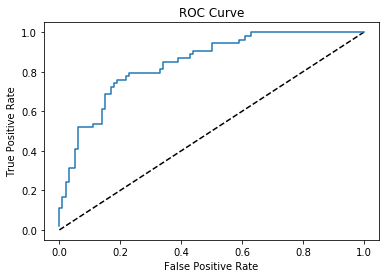

In [159]:
from sklearn.metrics import roc_curve
y_pred_prob = logreg.predict_proba(df_test_X)[:,1]
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [216]:
#This is a tool for calculating the single probability of having diabetes given a set of parameters
import math
def sigmoid(preg, gluc, blood, skin, insul, bmi, dpf, age):
    lincomb = (logreg.coef_[:,0]*preg) + (logreg.coef_[:,1]*gluc) + (logreg.coef_[:,2]*blood) + (logreg.coef_[:,3]*skin) + (logreg.coef_[:,4]*insul) + (logreg.coef_[:,5]*bmi) + (logreg.coef_[:,6]*dpf) + (logreg.coef_[:,7]*age)
    sig = 1/ (1 + math.exp(-lincomb))
    return print('The chance of diabetes is %s' %round(sig*100) + '%.')

In [217]:
sigmoid(1,1,1,1,1,1,1,1)

The chance of diabetes is 64%.
